In [1]:
# first installing pandas, numpy, matplotlib into the system

## Importing, reading csv files

In [67]:
# Step 1: importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline 
#"%matplotlib inline" causes plots/graphs to be display just below cell where the commands are written

In [68]:
# Step 2: reading csv file with pandas
train_df = pd.read_csv("traindata_copy_copy.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,584900,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,458300,150800.0,1280000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,300000,0.0,660000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,258300,235800.0,1200000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,600000,0.0,1410000.0,360.0,1.0,Urban,Y


In [69]:
train_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,290000,0.0,710000.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,410600,0.0,400000.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,807200,24000.0,2530000.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,758300,0.0,1870000.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,458300,0.0,1330000.0,360.0,0.0,Semiurban,N


In [70]:
# displaying no. of rows and cols of dataset
train_df.shape

(614, 13)

In [71]:
# displaying full info of dataset regarding data type, null/non-null, etc.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [72]:
# Step 3: displaying sum of null values in the dataset
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [73]:
# displaying mean, median, count, etc. of the dataset
train_df.describe() # by default only shows those cols that are integer

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,5.920000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.464122e+06,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.558733e+05,65.12041,0.364878
min,1.500000e+04,0.000000e+00,9.000000e+04,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,1.000000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.280000e+06,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.680000e+06,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+06,480.00000,1.000000


In [74]:
# displaying cols of the dataset
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Data Pre-processing

In [75]:
# Step 4: eliminating null values
# For numerical values, mean is used
# For categorical values, mode is used

In [76]:
# handling numerical cols first
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].median())

In [77]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
train_df['Married'].mode()[0]

'Yes'

In [79]:
# handling categorical cols then
train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].mode()[0])
train_df['Married'] = train_df['Married'].fillna(train_df['Married'].mode()[0])
train_df['Dependents'] = train_df['Dependents'].fillna(train_df['Dependents'].mode()[0])
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0])

In [80]:
# handled all missing values in the dataset
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [81]:
train_df.shape

(614, 13)

## Exploratory Data Analysis

In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [83]:
# Step 5: plotting graph for categorical data & numerical data
# countplot for categorical values
# distplot for numerical values

<AxesSubplot:xlabel='Dependents', ylabel='count'>

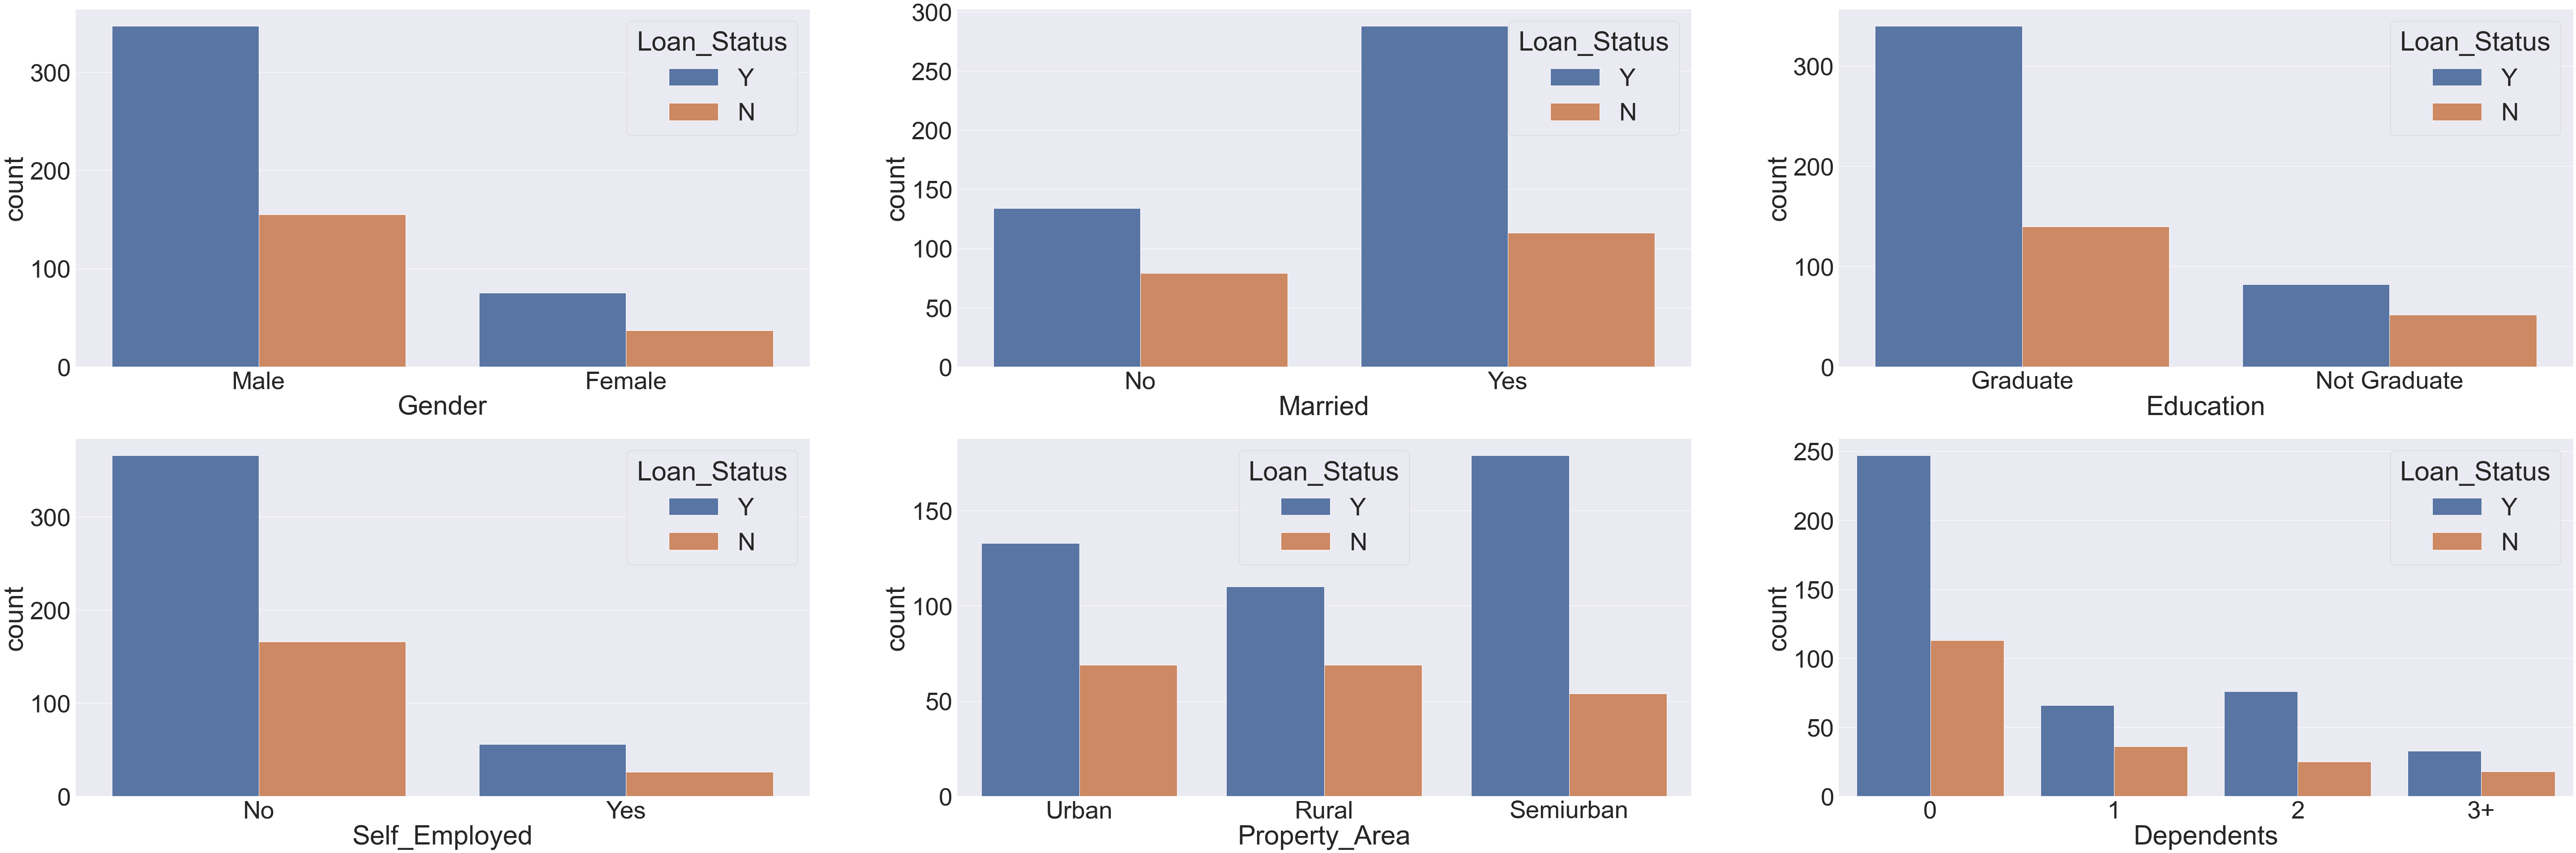

In [84]:
# countplot is used for categorical value
plt.figure(figsize=(100,50))
sns.set(font_scale = 5)

plt.subplot(331)
sns.countplot(train_df['Gender'], hue=train_df['Loan_Status'])

plt.subplot(332)
sns.countplot(train_df['Married'], hue=train_df['Loan_Status'])

plt.subplot(333)
sns.countplot(train_df['Education'], hue=train_df['Loan_Status'])

plt.subplot(334)
sns.countplot(train_df['Self_Employed'], hue=train_df['Loan_Status'])

plt.subplot(335)
sns.countplot(train_df['Property_Area'], hue=train_df['Loan_Status'])

plt.subplot(336)
sns.countplot(train_df['Dependents'], hue=train_df['Loan_Status'])

In [85]:
train_df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [86]:
train_df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

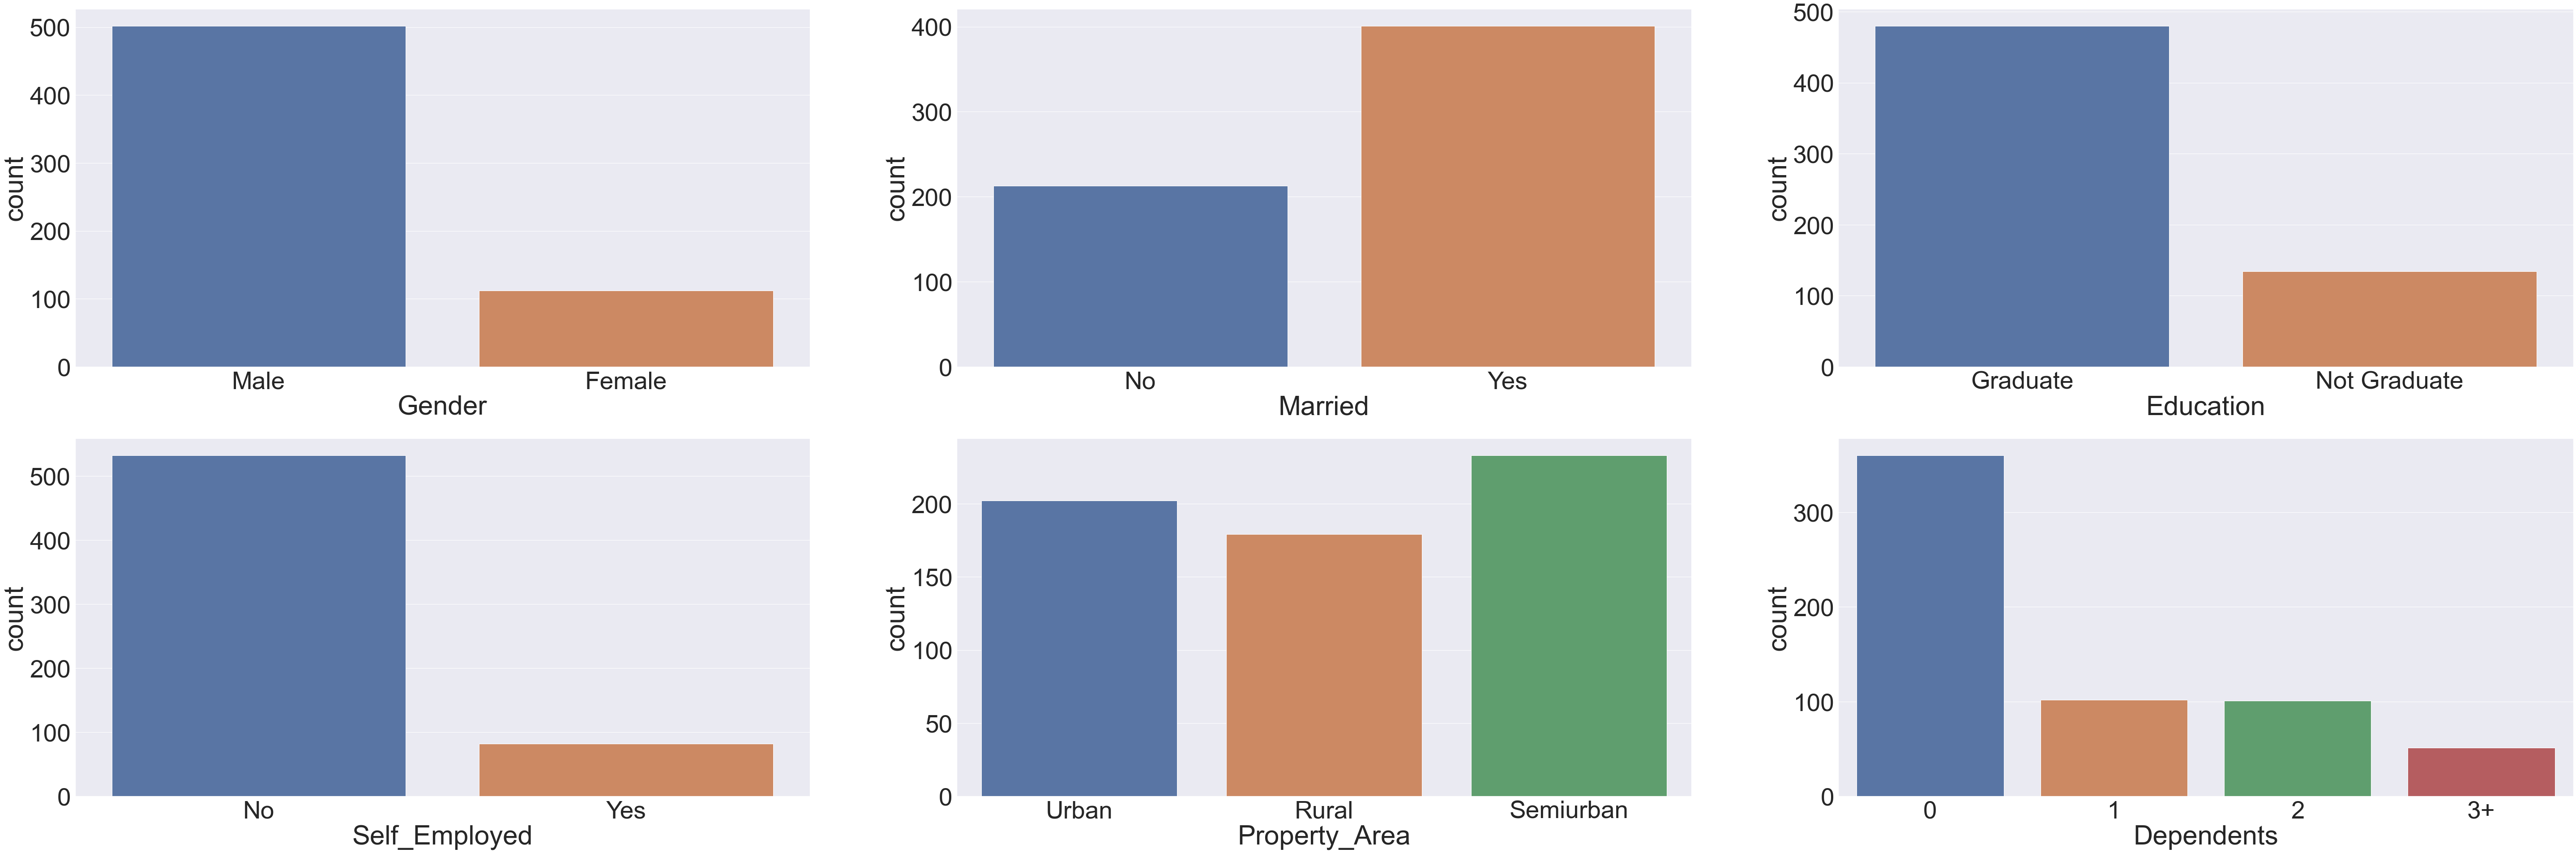

In [87]:
plt.figure(figsize=(100,50))
sns.set(font_scale = 5)

plt.subplot(331)
sns.countplot(train_df['Gender'])

plt.subplot(332)
sns.countplot(train_df['Married'])

plt.subplot(333)
sns.countplot(train_df['Education'])

plt.subplot(334)
sns.countplot(train_df['Self_Employed'])

plt.subplot(335)
sns.countplot(train_df['Property_Area'])

plt.subplot(336)
sns.countplot(train_df['Dependents'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

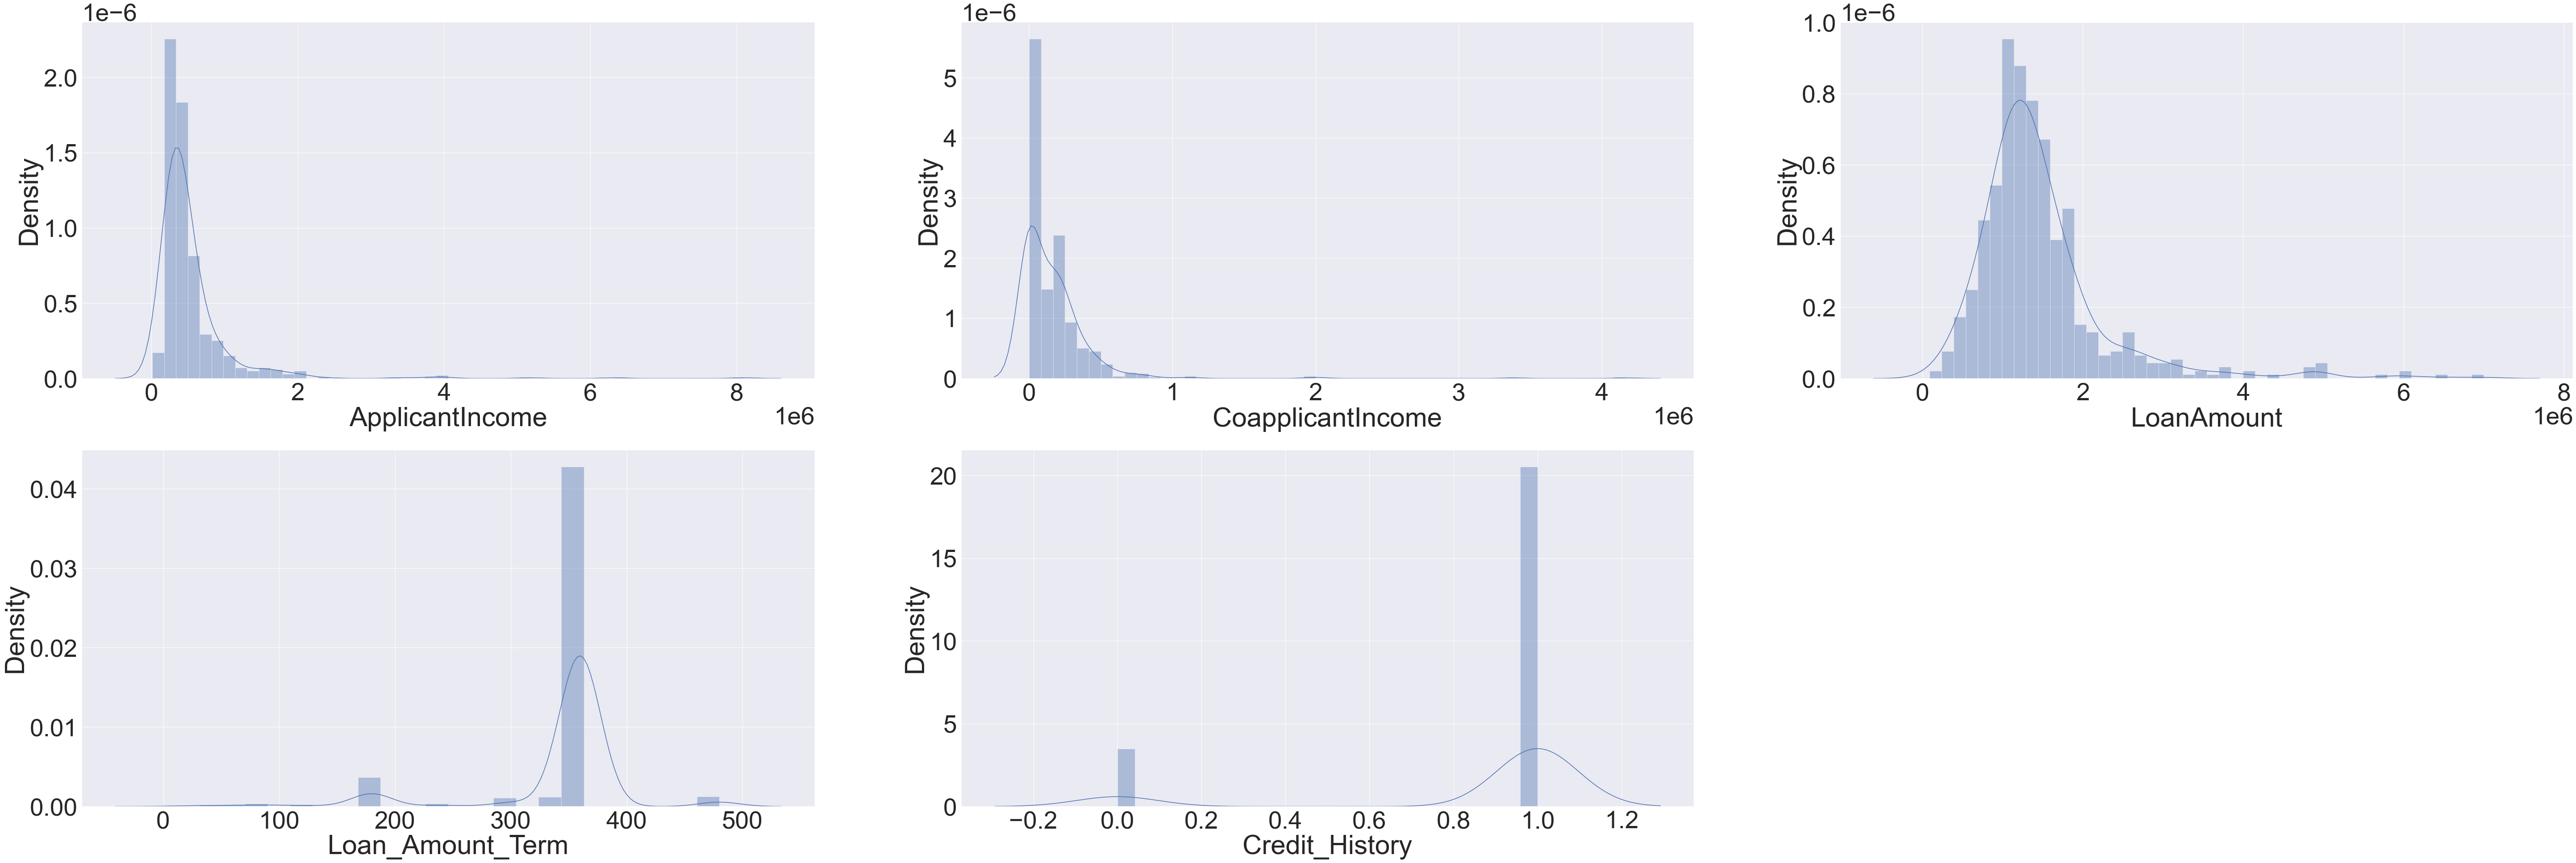

In [88]:
# distplot is used for numerical values
plt.figure(figsize=(100,50))
sns.set(font_scale = 5)

plt.subplot(331)
sns.distplot(train_df['ApplicantIncome'])

plt.subplot(332)
sns.distplot(train_df['CoapplicantIncome'])

plt.subplot(333)
sns.distplot(train_df['LoanAmount'])

plt.subplot(334)
sns.distplot(train_df['Loan_Amount_Term'])

plt.subplot(335)
sns.distplot(train_df['Credit_History'])

In [89]:
# we find all the distplot are not equally distributed, so we have to distribute them equally

In [90]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,584900,0.0,1.464122e+06,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,458300,150800.0,1.280000e+06,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,300000,0.0,6.600000e+05,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,258300,235800.0,1.200000e+06,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,600000,0.0,1.410000e+06,360.0,1.0,Urban,Y


In [91]:
# making one more column in dataframe
train_df['TotalIncome'] = train_df['ApplicantIncome']+train_df['CoapplicantIncome']
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,584900,0.0,1.464122e+06,360.0,1.0,Urban,Y,584900.0
1,LP001003,Male,Yes,1,Graduate,No,458300,150800.0,1.280000e+06,360.0,1.0,Rural,N,609100.0
2,LP001005,Male,Yes,0,Graduate,Yes,300000,0.0,6.600000e+05,360.0,1.0,Urban,Y,300000.0
3,LP001006,Male,Yes,0,Not Graduate,No,258300,235800.0,1.200000e+06,360.0,1.0,Urban,Y,494100.0
4,LP001008,Male,No,0,Graduate,No,600000,0.0,1.410000e+06,360.0,1.0,Urban,Y,600000.0


## Data Transformation

In [92]:
# Step 6: Data Transformation for equal distribution 

In [93]:
# handling numerical data using np.log() 
train_df['ApplicantIncomeLog'] = np.log(train_df['ApplicantIncome'])

In [94]:
train_df['TotalIncomeLog'] = np.log(train_df['TotalIncome'])

In [95]:
train_df['LoanAmountLog'] = np.log(train_df['LoanAmount'])

In [96]:
train_df['Loan_Amount_TermLog'] = np.log(train_df['Loan_Amount_Term'])

<AxesSubplot:xlabel='TotalIncomeLog', ylabel='Density'>

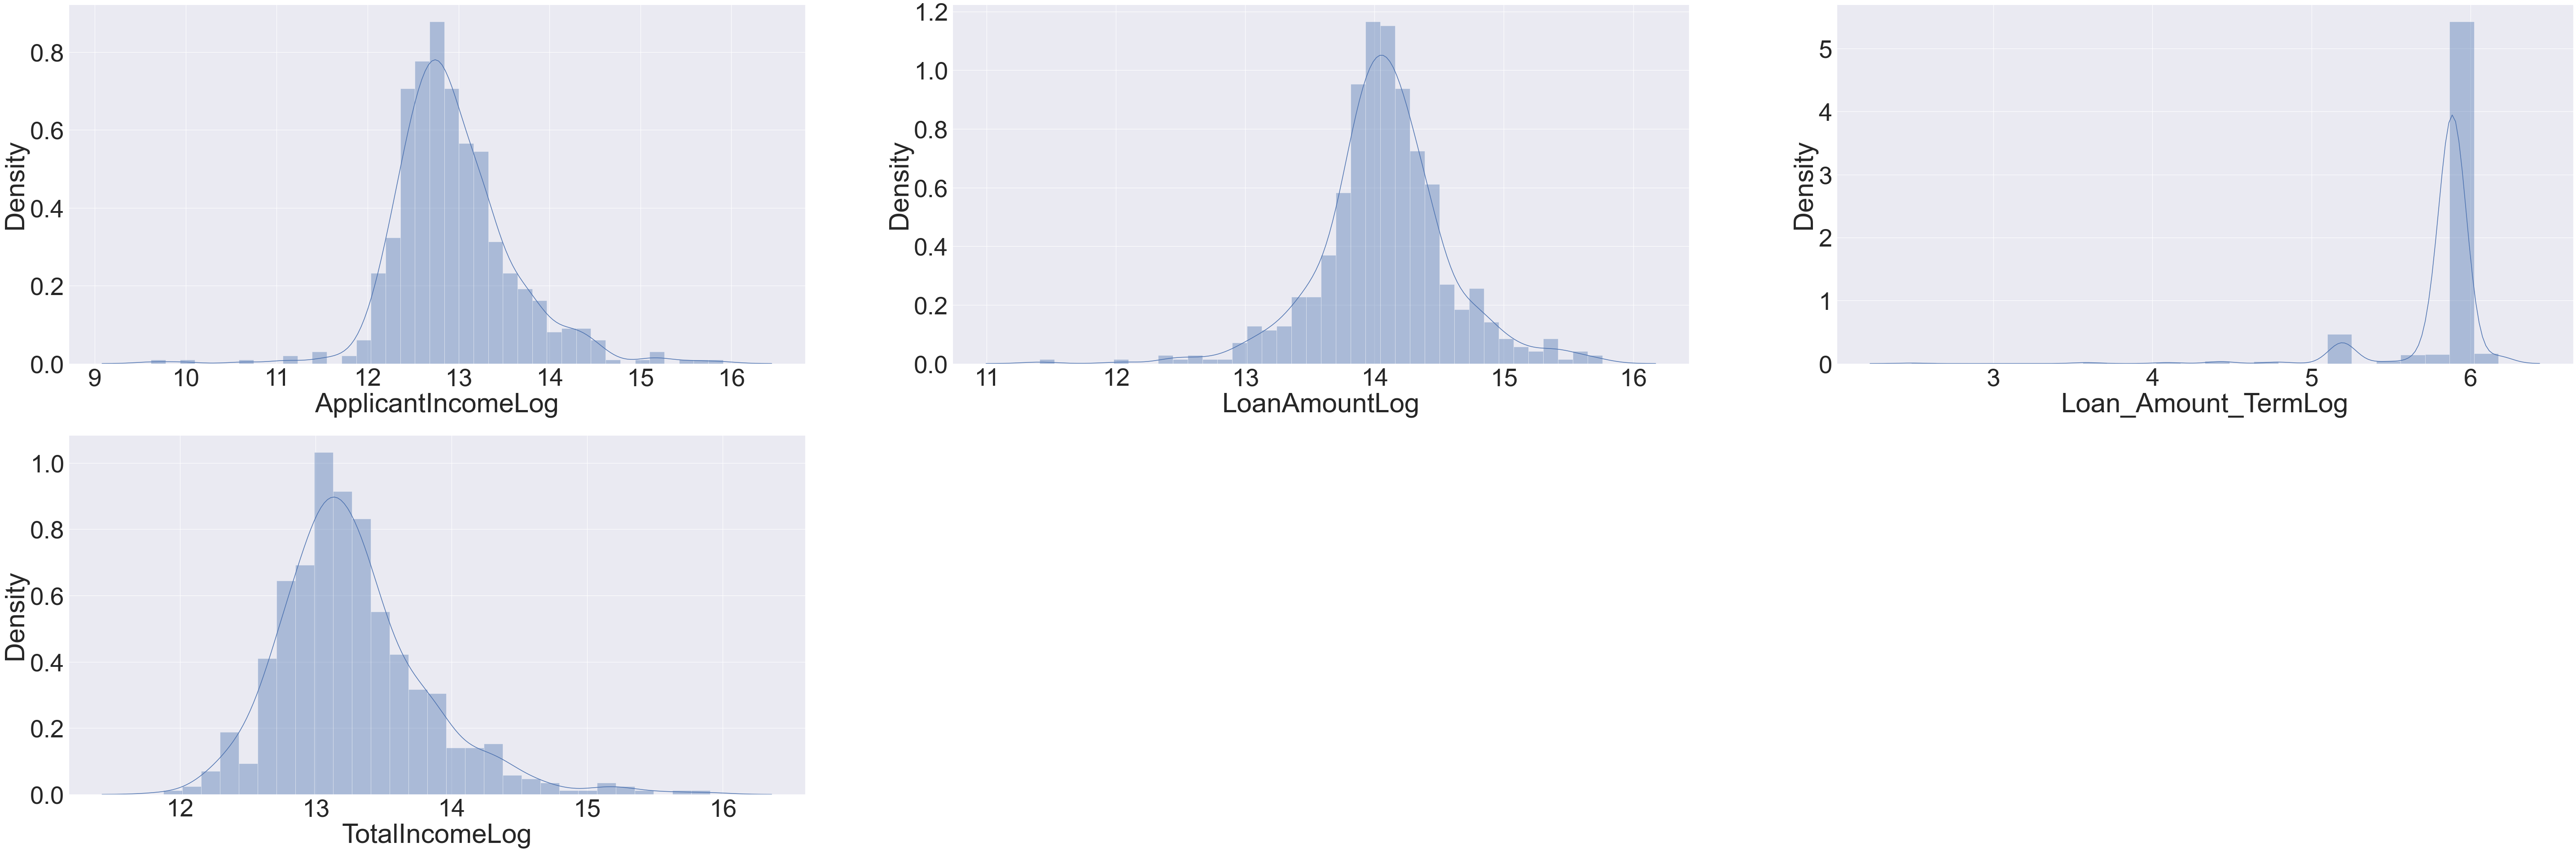

In [97]:
plt.figure(figsize=(100,50))
sns.set(font_scale = 5)

plt.subplot(331)
sns.distplot(train_df['ApplicantIncomeLog'])

plt.subplot(332)
sns.distplot(train_df['LoanAmountLog'])

plt.subplot(333)
sns.distplot(train_df['Loan_Amount_TermLog'])

plt.subplot(334)
sns.distplot(train_df['TotalIncomeLog'])

In [98]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,LP001002,Male,No,0,Graduate,No,584900,0.0,1.464122e+06,360.0,1.0,Urban,Y,584900.0,13.279196,13.279196,14.196766,5.886104
1,LP001003,Male,Yes,1,Graduate,No,458300,150800.0,1.280000e+06,360.0,1.0,Rural,N,609100.0,13.035279,13.319738,14.062371,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,300000,0.0,6.600000e+05,360.0,1.0,Urban,Y,300000.0,12.611538,12.611538,13.399995,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,258300,235800.0,1.200000e+06,360.0,1.0,Urban,Y,494100.0,12.461877,13.110493,13.997832,5.886104
4,LP001008,Male,No,0,Graduate,No,600000,0.0,1.410000e+06,360.0,1.0,Urban,Y,600000.0,13.304685,13.304685,14.159100,5.886104


In [99]:
# Step 7: Dropping unnecessary columns from dataframe, where axis=1 means column wise
cols = ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','TotalIncome']
train_df = train_df.drop(columns=cols, axis=1)

In [100]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,13.279196,13.279196,14.196766,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,13.035279,13.319738,14.062371,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,12.611538,12.611538,13.399995,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,12.461877,13.110493,13.997832,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,13.304685,13.304685,14.159100,5.886104


In [101]:
# handling categorical data

In [102]:
# calculating value of a categorical data
train_df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    object 
 1   Married              614 non-null    object 
 2   Dependents           614 non-null    object 
 3   Education            614 non-null    object 
 4   Self_Employed        614 non-null    object 
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    object 
 7   Loan_Status          614 non-null    object 
 8   ApplicantIncomeLog   614 non-null    float64
 9   TotalIncomeLog       614 non-null    float64
 10  LoanAmountLog        614 non-null    float64
 11  Loan_Amount_TermLog  614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [104]:
# Step 8: replacing categorical values into numerical values

In [105]:
d1 = pd.get_dummies(train_df['Gender'], drop_first= True)
d2 = pd.get_dummies(train_df['Married'], drop_first= True)
d3 = pd.get_dummies(train_df['Dependents'], drop_first= True)
d4 = pd.get_dummies(train_df['Education'], drop_first= True)
d5 = pd.get_dummies(train_df['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(train_df['Property_Area'], drop_first= True)

In [106]:
train_df1 = pd.concat([train_df, d1, d2, d3, d4, d5, d6], axis = 1)
train_df = train_df1

In [107]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,TotalIncomeLog,...,Loan_Amount_TermLog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,Male,No,0,Graduate,No,1.0,Urban,Y,13.279196,13.279196,...,5.886104,1,0,0,0,0,0,0,0,1
1,Male,Yes,1,Graduate,No,1.0,Rural,N,13.035279,13.319738,...,5.886104,1,1,1,0,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,12.611538,12.611538,...,5.886104,1,1,0,0,0,0,1,0,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,12.461877,13.110493,...,5.886104,1,1,0,0,0,1,0,0,1
4,Male,No,0,Graduate,No,1.0,Urban,Y,13.304685,13.304685,...,5.886104,1,0,0,0,0,0,0,0,1


In [108]:
cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
for col in cols:
    train_df = train_df.drop(columns=col, axis=1)

In [109]:
train_df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,13.279196,13.279196,14.196766,5.886104,1,0,0,0,0,0,0,0,1
1,1.0,N,13.035279,13.319738,14.062371,5.886104,1,1,1,0,0,0,0,0,0
2,1.0,Y,12.611538,12.611538,13.399995,5.886104,1,1,0,0,0,0,1,0,1
3,1.0,Y,12.461877,13.110493,13.997832,5.886104,1,1,0,0,0,1,0,0,1
4,1.0,Y,13.304685,13.304685,14.159100,5.886104,1,0,0,0,0,0,0,0,1


In [110]:
# train_df['Loan_Status'].replace('Y', 1, inplace=True)
# train_df['Loan_Status'].replace('N', 0, inplace=True)

In [111]:
# train_df['Loan_Status'].value_counts()

In [112]:
# train_df.Gender = train_df.Gender.map({'Male':1, 'Female':0})
# train_df['Gender'].value_counts()

In [113]:
# train_df.Married = train_df.Married.map({'Yes':1, 'No':0})
# train_df['Married'].value_counts()

In [114]:
# train_df.Dependents = train_df.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
# train_df['Dependents'].value_counts()

In [115]:
# train_df.Education = train_df.Education.map({'Graduate':1, 'Not Graduate':0})
# train_df['Education'].value_counts()

In [116]:
# train_df.Self_Employed = train_df.Self_Employed.map({'Yes':1, 'No':0})
# train_df['Self_Employed'].value_counts()

In [117]:
# train_df.Property_Area = train_df.Property_Area.map({'Rural':0, 'Semiurban':1, 'Urban':2})
# train_df['Property_Area'].value_counts()

## Final Train DataFrame

In [118]:
train_df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,13.279196,13.279196,14.196766,5.886104,1,0,0,0,0,0,0,0,1
1,1.0,N,13.035279,13.319738,14.062371,5.886104,1,1,1,0,0,0,0,0,0
2,1.0,Y,12.611538,12.611538,13.399995,5.886104,1,1,0,0,0,0,1,0,1
3,1.0,Y,12.461877,13.110493,13.997832,5.886104,1,1,0,0,0,1,0,0,1
4,1.0,Y,13.304685,13.304685,14.159100,5.886104,1,0,0,0,0,0,0,0,1


In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Credit_History       614 non-null    float64
 1   Loan_Status          614 non-null    object 
 2   ApplicantIncomeLog   614 non-null    float64
 3   TotalIncomeLog       614 non-null    float64
 4   LoanAmountLog        614 non-null    float64
 5   Loan_Amount_TermLog  614 non-null    float64
 6   Male                 614 non-null    uint8  
 7   Yes                  614 non-null    uint8  
 8   1                    614 non-null    uint8  
 9   2                    614 non-null    uint8  
 10  3+                   614 non-null    uint8  
 11  Not Graduate         614 non-null    uint8  
 12  Yes                  614 non-null    uint8  
 13  Semiurban            614 non-null    uint8  
 14  Urban                614 non-null    uint8  
dtypes: float64(5), object(1), uint8(9)
memor

In [120]:
train_df.describe()

,Credit_History,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.855049,12.946383,13.274584,14.072406,5.802065,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990
std,0.352339,0.645263,0.545102,0.496575,0.312482,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229
min,0.000000,9.615805,11.878957,11.407565,2.484907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.569847,12.939882,13.817998,5.886104,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12.851211,13.202375,14.070153,5.886104,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,13.269920,13.530720,14.314766,5.886104,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,15.907375,15.907375,15.761421,6.173786,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train-Test split

In [121]:
# specifying input and output attributes
x = train_df.drop(columns=['Loan_Status'], axis=1)
y = train_df['Loan_Status']

In [122]:
train_df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,13.279196,13.279196,14.196766,5.886104,1,0,0,0,0,0,0,0,1
1,1.0,N,13.035279,13.319738,14.062371,5.886104,1,1,1,0,0,0,0,0,0
2,1.0,Y,12.611538,12.611538,13.399995,5.886104,1,1,0,0,0,0,1,0,1
3,1.0,Y,12.461877,13.110493,13.997832,5.886104,1,1,0,0,0,1,0,0,1
4,1.0,Y,13.304685,13.304685,14.159100,5.886104,1,0,0,0,0,0,0,0,1


In [123]:
x.head()

,Credit_History,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,13.279196,13.279196,14.196766,5.886104,1,0,0,0,0,0,0,0,1
1,1.0,13.035279,13.319738,14.062371,5.886104,1,1,1,0,0,0,0,0,0
2,1.0,12.611538,12.611538,13.399995,5.886104,1,1,0,0,0,0,1,0,1
3,1.0,12.461877,13.110493,13.997832,5.886104,1,1,0,0,0,1,0,0,1
4,1.0,13.304685,13.304685,14.159100,5.886104,1,0,0,0,0,0,0,0,1


In [124]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [125]:
# importing libraries for train_test_split
from sklearn.model_selection import train_test_split

In [126]:
# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [127]:
x_train.head()

,Credit_History,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
46,1.0,13.244404,13.244404,12.994530,5.886104,1,1,1,0,0,0,0,0,1
272,1.0,12.554262,13.058358,14.046622,5.886104,1,0,0,0,0,0,0,0,0
474,1.0,13.223475,13.833350,14.297937,5.886104,1,0,0,1,0,0,0,0,0
382,1.0,13.304685,13.304685,14.260196,5.886104,0,0,0,0,0,0,0,0,1
283,1.0,12.106805,12.759095,13.199324,5.886104,0,0,0,0,0,0,0,0,1


In [128]:
x_test.head()

,Credit_History,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
454,1.0,13.470905,13.470905,13.641157,5.886104,1,0,0,0,0,0,1,1,0
52,1.0,12.955127,12.955127,13.928839,5.886104,0,0,0,0,0,0,0,1,0
536,1.0,13.326609,13.819403,14.991084,5.886104,1,1,0,0,0,0,0,0,1
469,1.0,12.979186,13.427492,13.910821,5.886104,1,1,0,0,0,0,0,0,1
55,1.0,12.509136,12.867471,13.785051,5.886104,1,1,0,1,0,0,0,1,0


In [129]:
y_train.head()

46     Y
272    Y
474    Y
382    Y
283    Y
Name: Loan_Status, dtype: object

In [130]:
y_test.head()

454    Y
52     N
536    Y
469    N
55     Y
Name: Loan_Status, dtype: object

## Model Training

In [131]:
# importing classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn import metrics

#### Using Random Forest

In [132]:
RFmodel = RandomForestClassifier()
RFmodel.fit(x_train, y_train)
RF_CV_score = cross_val_score(RFmodel, x, y, cv=5)

In [133]:
print("Accuracy using Random Forest classifier is ", RFmodel.score(x_test, y_test)*100,"%.")
# Cross validation is for better validation of model
print("Cross validation for Random Forest is ", np.mean(RF_CV_score)*100, "%.")

Accuracy using Random Forest classifier is  81.81818181818183 %.
Cross validation for Random Forest is  78.17672930827669 %.


#### Using Logistic Regression

In [134]:
LRmodel = LogisticRegression()
LRmodel.fit(x_train, y_train)
LR_CV_score = cross_val_score(LRmodel, x, y, cv=5)

In [135]:
print("Accuracy using Logistic Regression classifier is ", LRmodel.score(x_test, y_test)*100,"%.")
print("Cross validation for Logistic Regression is ", np.mean(LR_CV_score)*100, "%.")

Accuracy using Logistic Regression classifier is  83.11688311688312 %.
Cross validation for Logistic Regression is  80.9462881514061 %.


#### Using Naive-Bayes

In [136]:
NBmodel = GaussianNB()
NBmodel.fit(x_train, y_train)
NB_CV_score = cross_val_score(NBmodel, x, y, cv=5)

In [137]:
print("Accuracy using Naive-Bayes classifier is ", NBmodel.score(x_test, y_test)*100,"%.")
print("Cross validation for Naive-Bayes is ", np.mean(NB_CV_score)*100, "%.")

Accuracy using Naive-Bayes classifier is  82.46753246753246 %.
Cross validation for Naive-Bayes is  80.13194722111156 %.


#### Using KNN-Neighbors

In [138]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(x_train, y_train)
KNN_CV_score = cross_val_score(KNNmodel, x, y, cv=5)

In [139]:
print("Accuracy using KNN classifier is ", KNNmodel.score(x_test, y_test)*100,"%.")
print("Cross validation for KNN is ", np.mean(KNN_CV_score)*100, "%.")

Accuracy using KNN classifier is  76.62337662337663 %.
Cross validation for KNN is  74.75409836065575 %.


#### Using Decision Tree

In [140]:
DTmodel = DecisionTreeClassifier()
DTmodel.fit(x_train, y_train)

DecisionTreeClassifier()

In [141]:
print("Accuracy using Decision Tree classifier is ", DTmodel.score(x_test, y_test)*100,"%.")

Accuracy using Decision Tree classifier is  70.77922077922078 %.


#### Using Support Vector Machine

In [142]:
SVMmodel = SVC()
SVMmodel.fit(x_train, y_train)

SVC()

In [143]:
print("Accuracy using SVM classifier is ", SVMmodel.score(x_test, y_test)*100,"%.")

Accuracy using SVM classifier is  72.07792207792207 %.


## Hyper-parameter Tuning

In [144]:
# Hyper-parameter Tuning is for improvement of the accuracy.

In [145]:
RFmodel = RandomForestClassifier(n_estimators=50, min_samples_split=25, max_depth=7, max_features=1)
RFmodel.fit(x_train, y_train)
RF_CV_score = cross_val_score(RFmodel, x, y, cv=5)

print("Accuracy using Random Forest classifier is ", RFmodel.score(x_test, y_test)*100,"%.")
print("Cross validation for Random Forest is ", np.mean(RF_CV_score)*100, "%.")

Accuracy using Random Forest classifier is  82.46753246753246 %.
Cross validation for Random Forest is  76.3814474210316 %.


## Confusion Matrix

In [146]:
# A confusion matrix is a summary of prediction results on a classification problem. 

In [147]:
# importing
from sklearn.metrics import confusion_matrix

In [148]:
# using Logistic Regression Model
y_pred = LRmodel.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [149]:
# In following heatmap: 
    # 0 means NO, 1 means Yes
    # y-axis is accurate values, x-axis is predicted values
    # Left diagonal i.e. 19 & 109 are correctly predicted. For 0, 19 is correctly predicted and for 1, 109 is correctly predicted.
    # Rest of the 2 and 24 (i.e. right diagonal) are the ones not correctly predicted.

<AxesSubplot:>

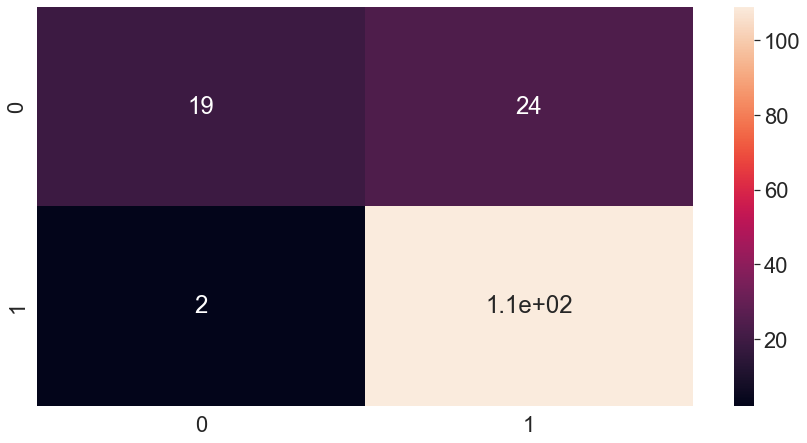

In [150]:
plt.figure(figsize=(50,25))
sns.set(font_scale = 2)

plt.subplot(331)
sns.heatmap(cm, annot=True)

## Saving Model

In [151]:
import pickle

In [152]:
filename = 'LRmodelcopy.pkl'
pickle.dump(LRmodel, open(filename, 'wb'))